# Futures Price Predictor Version 0.1

### This project idea was inspired by the movie "The Social Network" scene in which Zuckerberg's character is talking to a friend explaining the 300K a friend made by finding the correlation between heating oil futures and meteorology. We will attempt a similar model to predict the heating oil or natural gas futures prices given weather data, as well as other predictors.

<center><img src="Soial_Network.jpg"></center> 

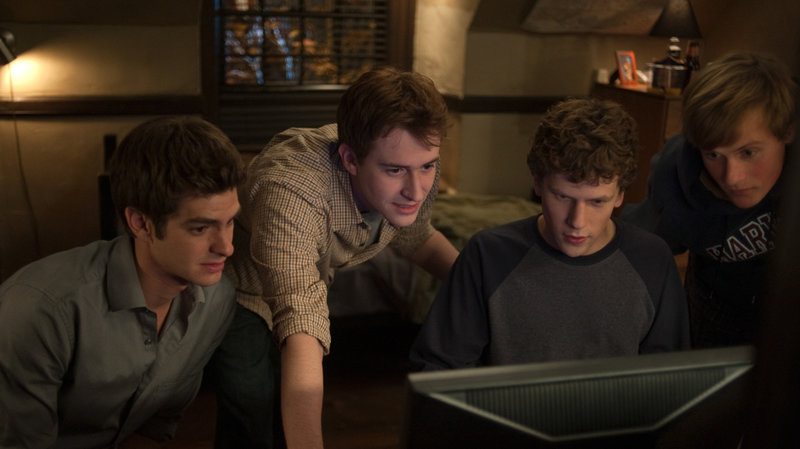

# Sections:
## 1. [Hypothesis](#Hypothesis)
## 2. [Research](#Research)
## 3. [Data Needed](#Data-Needed)
## 4. [Initial Model Selections](#Initial-Model-Selection)
## 5. [Data Wranglin'](#Data_Wranglin)
<br>

<a id='Hypothesis'></a>
## 1. Hypothesis

#### The hypothesis we are testing is whether or not futures prices target variable can be predicted given various predictor variables that will initially consist of (and adjusted based on historical correlation):

 - Weather Patterns (in the contiguous United States, or other countries (exports) given additional findings)
 - Other futures prices
 - GDP measures of various countries
 - Weather sentiment (web scraper for positive/negative weather reports in future)
 - Farmer's Almanac predictors
 <br>

<a id='Research'></a>
## 2. Research

#### This research section will explore some of the assumptions I have made, identify possible data sets that I have not identified for inclusion going forward, and look for ways to limit our data to provide meaningful insights (e.g. which part of the country has the largest market share of heating oil or natural gas, and therefore the most influence on commodity demand given supply. Also are there unidentified metrics like crude oil production that may influence heating oil and natural gas prices? 

### Heating Oil

#### "The legal difference between diesel and heating oil in US is sulfur allowance (<15ppm for diesel, <500ppm for heating oil)" - https://en.wikipedia.org/wiki/Heating_oil
This may useful info for using diesel as a close proxy for heating oil predictors where needed. 

#### Known as No.2 Heating Oil in US. Heating oil futures contracts trade in units of 1,000 barrels with minimum fluctuation of $0.0001 per gallon, based on delivery in NY Harbor. CME 

#### Crude costs highly affect heating oil prices, distilled from crude - EIA
Need to ensure crude oil data is being used alongside to predict. This will help since OPEC decisions on outputs are generally agreed upon and stated publicly, whether or not that is actually the case. 

#### 3.11 billion gallons sold residentially to US Northeast in 2018 - EIA

#### In US, Northeast accounts for 82% of all household consumers. - EIA
#### 2018, 35% of total commercial sector distillate fuel oil consumption was in US Norhteast. - EIA

#### EIA PADD (Petro Admin for Defense Districts):
#### PADD 1A, NE: ME, VT, NH, MA, RI, CT
#### PADD 1B, CentAtl: NY, PA, NJ, DE, MD 

#### While ignoring other parts of the country, or hidden uses of heating oil, I will focus the heating oil predictors on these states within the United States since they account for such a large market share of heating oil. 

#### Next, I will look at natural gas as well, which is top in residential energy sector, with 58% of homes in the US using natural gas for heating. - EIA

### Natural Gas

#### Natural Gas use in US by sector - EIA
electric power - 35%,
industrial - 33%,
residential - 17%,
commercial - 12%,
transportation - 3%

#### Since such a large amount of natural gas is used, EIA cites that increases in temperatures can also affect natural gas prices upwards, thus making it more difficult to gauge if correlation is positive or negative. This may be overcome by using the absolute difference from the average temperature over that period of time? But at this point I am not sure I want to use natural gas as a seperate target variable on top of the model for heating oil.

### Gasoline

#### In crude oil distillation, for 2018 EIA reported that roughly 50% of crude was distilled to gasoline, while 25% was distilled to diesel fuel oils. This may point to a negative correlation of gasoline and heating oil prices, since as demand for one grows, the price should also increase. This might result in refineries distilling more gasoline or heating oil, dependent on what is at a higher market price?

### Trading Futures

#### I will need to establish the most realistic/feasible timeframe I can use a trading strategy with, and with how far in the future the restricitons on weather predictions are for the second part of the model that I can leverage to make futures predictions with.

#### Investment instruments for futures:
 - Direct Futures: The historical data of futures seems to be exceedingly expenseive (+$20K for all historical), however I may be able to find a resource for the data somewhere for less. Additionally, the downside of actual investment (if deploying this trading strategy eventually) would be immense, given the huge amount of capital required and the eventual risk that I may have to accept delivery on 10,000 barrels of diesel showing up in my yard
 - Options: Options can be poor representaion of the underlying asset over the longterm. I will look into this to see if it is viable. 
 - CFDs: Would be perfect! They offer 24 hr trading and are bets made with the brokerage house on the spread of purchase price and closing price of an underlying asset value. However, due to the insanely loose regs on margin (50:1 in some cases!) buying, the US banned these for US residents (lame sauce, risk is risk ppl...do your hw...)
 - ETFs: Only heating oil ETF delisted. 
 - Oil Companies: NO. Far more variables involved and need to be considerd in companies versus a commodity itself. 


### Timeframes for trading Heating Oil

#### Settled on Futures or Options.
#### Futures:
 - Traded on CME. 
 - 42,000 gallons/contract. 
 - Contracts expire last business day of the month.
 - can sell contract before expiration, but not if the contract is in the red.

#### Options:
 - Can deploy various options strategies given price down, flat, upward to be ITM. 
 - Contracts expire three days before expiration date of future itself. 
 - Can sell option before expiration

### Given the advantage in downside risk, and lower cost for initial investment, I will use an options trading strategy(ies) to implement the model using TDAmeritrade Paper Money once it is created.

#### Heating Oil Options:
 - Premium on heating oil put/call option = (option price * 42,000), usually somewhere between 20K and 1K 
 - Options trade on CME Globex (OH) 

<a id='Data-Needed'></a>
## 3. Data Needed

### Weather Patterns

#### We will look at obtaining a weather pattern predictor that is already pre-built. The most important data subset will the predicted average daily temperatures for any part of the country. This will be used in the model as a predictor variable in our 2nd stage model, not in our predictor variables for training the intial regression model on.

#### Additionally, we will need to obtain historical weather data for the U.S. for the predictor variable in our intial model.

### Futures Prices

####  We will need to obtain historical futures prices to train our model on. Hopefully we will be able to obtain the same date ranges as weather.

### GDP Measures

#### One hypothesis is that the higher the GDP output of the countries of the world are, the higher the prices of heating oil or natural gas will be in order to provide heat in the homes of persons able to pay for it. As demand for home ameniites increase as wealth increases across the globe, this should result in higher prices for a finite good like oil or natural gas (we will test this assumption).

#### We will need to obtain historical GDP output of countries in the world in the same date range as our spot prices and weather data.

### Weather Sentiment

#### I believe that since heating oil and natural gas are bought in bulk by the average homeowner, severe weather predictions for winter months in the United States will result in increased demand, and thus higher spot prices. 

#### We will need to create a web scraper for weather sentiment analysis. This will be difficult to fine tune given the amount of weather articles and keywords that will identify the news as postive or negative, as well as identifying if the news article is speaking to weather in the coming days, or the coming months. 
### This will be done in multiple steps:

 1. Is the weather report positive or negative?
 2. Is the weather report for near-term or long-term timeframe?
 3. Is the weather report for a particular geographical location in the US that will indeed experience colder weather?
 4. Additional Fine Tuning and preditors to be explored.
 

### Farmers Almanac Data

#### We will look at incorporating Farmers Almanac predictors as an additional data set.
#### The accuracy of the historical Farmers Almanac data will be assessed to see if it can supply meaningful data points to the 2nd stage model that will predict spot prices.
#### The future predictions in the most recent Farmers Almanac will be needed in order to incorporate as a predictor variable in our 2nd stage model.

<a id='Initial-Model-Selection'></a>
## 4. Initial Model Selections

#### Since we have various models feeding our final target variable, we will list them below:

 - 1st Stage Model: Spot price predictor. We will explore a regression model, whether it is one single random forest regressor, or a combination of other regressors and averaging the results for each respective model prediction. We will begin with a random forest regressor since it can be easily implemented with scikit, the slow computational time is not a concern since futures prices are not as volatile as somehting like virtual currency, and the estimates generally avoid overfitting given the nature of random forests to reduce variance by combining numerous outputs from numerous decision trees. Additionally a random forest regressor does not require us to normalize our data, thus saving us some data preprocessing work. However, I may do this regardless if we decide to incorporate other regressor models like SGD and should not affect the RF model.
 
 -  Weather News Sentiment Scraper: We will need to build a web scrpaing model that includes the following considerations:
    - 1. Is the weather report positive or negative?
    - 2. Is the weather report for near-term or long-term timeframe?
    - 3. Is the weather report for a particular geographical location in the US that will indeed      experience colder weather?
    - 4. Additional Fine Tuning and preditors to be explored.

In [1]:
import pandas as pd
import json
import numpy as np
import datetime
from dask.distributed import Client
import dask.dataframe as dd
import config
import itertools
import requests

<a id='Data_Wranglin'></a>
## 5. Data Wranglin'

#### We will gather the necessary data based on the order of the Data Needed section.

## Future Weather Data (existing weather models for integration):

#### We will look at obtaining a weather model that we can use to aid in predictions of futures prices. We will not be using this to train our model on iniitially and instead will use as an input for final futures price prediction (will look at using regression analysis for this second part?)

#### We will use the pvlib-python package to obtain forecasts easily, since it is a major component to the use of PV models (used to assess the strength of placing photovoltaic cells in a location to obtain a power energy forecast). 

#### The package uses weather data from NOAA's National Digital Forecast Database (NDFD). I may look at averaging other models together since the package has them readily available down the road. The standard WGS84 lat long sets are used with a start time and end time to get weather forecasts, but only in the United States. 

In [2]:
# # NDFD pvlib import
# tz = 'US/Mountain'

# # LATITUDE , LONGITUDE
# 31.0583,-87.055

# start = pd.Timestamp(datetime.date.today(), tz=tz) # today's date
# end = start + pd.Timedelta(days=7) # 7 days from today


# forecast_model = NDFD()

# forecast_data = forecast_model.get_processed_data(31.0583,-87.055, start, end)


### Issue getting the pvlib package to work even with examples given, will look at other options

### Historical Weather Data:

#### Setting up NOAA connection:

In [3]:
# This data will be used to get future temps on a regular basis to update and append to historical weather data from NOAA GHCN database. 

# NOAA API to access data    

import config

'config.noaa_key'

'config.noaa_key'

#### Import the historical weather data - Local to avoid large file size limitations from NOAA API + Only need to download once, and append new data to the file as it is released.

#### Given that I will be training the model once for the price prediction I am downloading the large (3GB) weather data set directly from NOAA (NOAA Global Historical Climatology Network - Daily (GHCN-Daily), Version 3)

#### I am limited to 10,000 individual records a day from NOAA API, therefore it may take multiple days to append new data once I finalize this project. I will explore data version control (good article on Towards Data Science on this topic.) 

#### Code for importing the NOAA Global Historical Climatology Network (GHCN) Stations Data 

In [4]:
client = Client()
client

/home/rb/miniconda3/lib/python3.7/site-packages/distributed/node.py:244: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40597 instead
  http_address["port"], self.http_server.port


Client Scheduler: tcp://127.0.0.1:33093 Dashboard: http://127.0.0.1:40597/status,Cluster Workers: 4 Cores: 12 Memory: 16.68 GB


In [5]:
# Metadata formatting
# code adjusted from ned cr on gitlab
metadata_col_specs = [
    (0,  11),
    (12, 20),
    (21, 30),
    (31, 37),
    (38, 40),
    (41, 71),
    (72, 75),
    (76, 79),
    (80, 85)
]

metadata_names = [
    "ID",
    "LATITUDE",
    "LONGITUDE",
    "ELEVATION",
    "STATE",
    "NAME",
    "GSN FLAG",
    "HCN/CRN FLAG",
    "WMO ID"]

metadata_dtype = {
    "ID": str,
    "STATE": str,
    "NAME": str,
    "GSN FLAG": str,
    "HCN/CRN FLAG": str,
    "WMO ID": str
    }

# read the station metadata and return it in a df
path = "/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/ghcnd-stations.txt"

def read_station_metadata(filename=path):
    
    df = dd.read_fwf(filename, colspecs = metadata_col_specs, header = None, names = metadata_names, dtype= metadata_dtype)
    
    return df


#### Code for importing the actual NOAA GHCN daily weather data from fixed width format. 

#### Dask is needed since the combination of dly fwf files eats up RAM I currently have on laptop when reading it all in. I was looking into using AWS server to run this on too, and will explore that later on.



In [6]:
# # Data formatting

# data_header_names = [
#     "ID",
#     "YEAR",
#     "MONTH",
#     "ELEMENT"]

# data_header_col_specs = [
#     (0,  11),
#     (11, 15),
#     (15, 17),
#     (17, 21)]

# data_header_dtypes = {
#     "ID": str,
#     "YEAR": int,
#     "MONTH": int,
#     "ELEMENT": str}

# data_col_names = [[
#     "VALUE" + str(i + 1),
#     "MFLAG" + str(i + 1),
#     "QFLAG" + str(i + 1),
#     "SFLAG" + str(i + 1)]
#     for i in range(31)]

# # Join sub-lists
# data_col_names = list(itertools.chain.from_iterable(data_col_names))


# data_replacement_col_names = [[
#     ("VALUE", i + 1),
#     ("MFLAG", i + 1),
#     ("QFLAG", i + 1),
#     ("SFLAG", i + 1)]
#     for i in range(31)]

# # Join sub-lists
# data_replacement_col_names = list(itertools.chain.from_iterable(data_replacement_col_names))



# data_replacement_col_names = pd.MultiIndex.from_tuples(
#     data_replacement_col_names,
#     names=['VAR_TYPE', 'DAY'])


# data_col_specs = [[
#     (21 + i * 8, 26 + i * 8),
#     (26 + i * 8, 27 + i * 8),
#     (27 + i * 8, 28 + i * 8),
#     (28 + i * 8, 29 + i * 8)]
#     for i in range(31)]


# data_col_specs = list(itertools.chain.from_iterable(data_col_specs))


# data_col_dtypes = [{
#     "VALUE" + str(i + 1): int,
#     "MFLAG" + str(i + 1): str,
#     "QFLAG" + str(i + 1): str,
#     "SFLAG" + str(i + 1): str}
#     for i in range(31)]


# data_header_dtypes.update({dtypecol: dtype for data in data_col_dtypes for dtypecol, dtype in data.items()})



# # Used linux terminal to append all text files together into one 'all_dly_files'
# # Use chunking to read large text file into dataframe in sections after filtering data points i want, then export to csv. 

# path_dly = '/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/all_dly_files'

# def read_dly_file(filename=path_dly):
    
#     df = pd.read_fwf(
#                 path_dly,
#                 colspecs = data_header_col_specs + data_col_specs,
#                 names = data_header_names + data_col_names,
#                 index_col = 'ID',
#                 dtype = data_header_dtypes,
#                 chunksize = 100000,
#                 iterator = True
#                 )
    
#     elements_needed = ['PRCP','SNOW','SNWD','TMAX','TMIN']
    
#     df_result = pd.concat([chunk[ (chunk['YEAR']>1970) 
#                                  & (chunk['ELEMENT'].isin(elements_needed))] for chunk in df])
    
#     return df_result

In [7]:
# df_all_dly = read_dly_file(filename=path_dly)

#### Ran export to CSV so refiltering is not needed each time. Did not look into Dask at this point, and would have been good to use here instead for previious fwf read.

In [8]:
#df_all_dly.to_csv('/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/dly_1970_present.csv')

#### script filtering my all_dly file below by year and element type (precip, temps) so I can decrease file size. Again, should have just used Dask to read in for this.... oh well!

In [9]:
# # read in filtered local csv

# import itertools
# import requests
# import pandas as pd
# import json
# import numpy as np
# from datetime import datetime

# path_1970_present = '/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/dly_1970_present.csv'

# # use this data for loading in data types for csv, also using the list of col names for fuzzy match to exclude columns that are not needed

# data_header_names = [
#     "ID",
#     "YEAR",
#     "MONTH",
#     "ELEMENT"]

# data_header_dtypes = {
#     "ID": str,
#     "YEAR": int,
#     "MONTH": int,
#     "ELEMENT": str}

# data_col_names = [[
#     "VALUE" + str(i + 1),
#     "MFLAG" + str(i + 1),
#     "QFLAG" + str(i + 1),
#     "SFLAG" + str(i + 1)]
#     for i in range(31)]

# data_col_names = list(itertools.chain.from_iterable(data_col_names))


# data_col_dtypes = [{
#     "VALUE" + str(i + 1): int,
#     "MFLAG" + str(i + 1): str,
#     "QFLAG" + str(i + 1): str,
#     "SFLAG" + str(i + 1): str}
#     for i in range(31)]

# data_header_dtypes.update({dtypecol: dtype for data in data_col_dtypes for dtypecol, dtype in data.items()})



# cols_needed = data_header_names + [col for col in data_col_names if col.startswith('VALUE')]

# weather_data_1970_present = pd.read_csv(path_1970_present, 
#                                         dtype = data_header_dtypes,
#                                         usecols = cols_needed)

# wd = weather_data_1970_present

# pd.set_option('display.max_columns', None)
# wd



#### Script to melt data, and get rid of day values split into seperate columns, and instead pivot these to rows by the combination of station ID, Year, Month, Element of daily observations.

In [10]:
# wd_melt = wd.melt(id_vars=['ID','YEAR','MONTH','ELEMENT'], var_name = "Value_Dates", value_name = 'Observed_Data')

# # Have to send file to csv to free up RAM from first csv read in (fixed this issue with dask.dataframe later on)

# wd_melt.to_csv('/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/weather_melt_master.csv')

#### Finally using Dask after finding it recommended online, uses indexing on large df and partitions it into smaller callable dataframes. Downside is same computation time when need to call entire large dataframe (e.g. number of rows in entire large dataframe), but works like a charm and uses ~1GB RAM total to read in 98million rows of data.

In [11]:
# # Importing dask dataframe to use with 4GB csv file

# import dask.dataframe as dd


# dtype={'MONTH': 'int64',
#        'Observed_Data': 'float64',
#        'YEAR': 'int64',
#        'ID': 'string',
#        'ELEMENT': 'string',
#        'Value_Dates': 'string'}

# path_melt = '/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/weather_melt_master.csv'

# weather_melt = dd.read_csv(path_melt, dtype=dtype)

# # Converting string date to datetime in csv
# weather_melt['Date']=dd.to_datetime((weather_melt.MONTH.astype(str) 
#                                      + weather_melt.Value_Dates.str[5:] 
#                                      + weather_melt.YEAR.astype(str)),
#                                     format = '%m%d%Y',
#                                     errors = 'coerce')

# # Saving csv with dates to local for reuse. 
# weather_melt.to_csv('/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/weather_melt_1.csv', single_file=True)

### Tried to look at using vaex for csv files, but the inputs and outputs need a lot of tweaks, and issues with import times versus dask.dataframe. Harder to perform operations in dask over entire dataset, but will use dask and just subset data at this point using dask. Hopefully vaex will have some bug fixes in the future that make it a better candidate.

In [12]:
# # Try importing weather csv using Vaex and comparing the speed and ease of use with Dask dataframe
# import vaex

# weather_data = '/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/weather_melt_1.csv'

# # Convert csv to hdf5 using bash locally, and then uploading. Converting a csv to a hdf5 file via pandas when my file is only 4GB is not worth the time to write vs one-liner in terminal and can be stored in memory.
# # CANNOT USE .to_hdf in pandas so the file i created locally will not work correctly in vaex.open. argh...
# # CANNOT USE from_csv() with 'convert' parameter mentioned in vaex docs either, think may be bug bc 'convert' works with vaex.open() even though that function passes to vaex.from_csv.
# # REOOMMENDED way to get csv to hdf5 for ease of import with vaex is Topcat, program for tabular data that can easily convert csv to hdf5. Need to read my docs more carefully...
# # After much frustration with Topcat and Java IDK versions, alongside bug in vaex file convert that had to deal with to make bash script, able to easily convert .csv to .hdf5 locally in half time vaex takes to convert within Jupyter. Only helps if using local csv though.
# # After all work to convert with Bash script, values in csv are being dropped...argh. .fits file is fine and all data shows in TopCat, but Vaex convert is dropping file data for some reason.
# # Best approach is to just settle for the 10 min upload time with vaex.open() with convert=True
# # Using convert to .fits with Topcat bash script, and then importing helps with memory issue, and data remains, but strings have b'' surround on all data points for some reason.

# #Abandoning vaex implementations of local csv for dask.dataframe. less bugs and faster for my purposes of filtering and then working with smaller dataframe in pandas.

# vaex_weather_melt = vaex.open(weather_data, convert=True)

In [13]:
# # Import weather melted data using dask dataframe

# dtype={'Observed_Data': 'float64',
#        'ID': 'string',
#        'ELEMENT': 'string'}

# weather_data = '/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/weather_melt_1.csv'

# weather_melt = dd.read_csv(weather_data, 
#                            dtype=dtype, 
#                            parse_dates=['Date'])

# weather_melt = weather_melt.drop('Unnamed: 0', axis=1)
# weather_melt.columns = ['ID', 'weather_obs', 'measure', 'date']
# weather_melt.head()

#### Now joining the station metadata to the weather data based on the station ID.

In [14]:
# path = "/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/ghcnd-stations.txt"

# station_data = read_station_metadata(filename=path)

# station_data = station_data.drop(['GSN FLAG', 'HCN/CRN FLAG', 'WMO ID'], axis = 1)


# # joining dask tables, documentation suggested a simple join with pandas df may not affect computations significantly anyways 

# weather_melt_stations = weather_melt.merge(station_data, how = 'inner', on = 'ID')

# weather_melt_stations = weather_melt_stations.rename(columns={'LATITUDE':'lat', 'LONGITUDE':'lon', 'ELEVATION':'elevation', 'STATE':'state', 'NAME':'station'})

# weather_melt_stations.head()

#### Given the large data table of weather data going back to 1970, we now have individual daily measurements for the following in various parts of the world:
 - Maximum Daily Observed Temp
 - Minimum Daily Observed Temp
 - Daily Precipitation Amounts
 - Daily Snow Amounts
 - Daily Snow Depth (assuming the larger retained snow amounts, the colder it will remain and thus the more heating oil or natural gas will be required.
 

#### We can look at limiting stations data in order to focus our analysis on high-marketshare heating oil or natural gas geographical locations. At first thought this may be places like the NE U.S. where many houses rely on heating oil, and places like Japan that account for a very large market share of LPG based on previous work/research with DoT PHMSA.

In [15]:
# # Select only the records that match the states in the Notheast
# #PADD 1A, NE: ME, VT, NH, MA, RI, CT
# #PADD 1B, CentAtl: NY, PA, NJ, DE, MD 

# NE_states = ['ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NY', 'PA', 'NJ', 'DE', 'MD']

# #Select subset of weather data for NE states, as well as limit data to 1985, since this is the same timeframe that is possible to acquire for historical heating oil future prices.

# weather_melt_stations_subset = weather_melt_stations[(weather_melt_stations['date'].dt.year > 1985)
#                                                      & (weather_melt_stations['state'].isin(NE_states))]

# weather_melt_stations_subset.head()

# # Will probably want to average over the TMAX and TMINS for a specific day for analysis. 
# # I could also model each station independently? Each state? This would lend more specificity for extreme weather shifts in certain areas. 


In [16]:
# # Exporting final dataset to csv for ease of use (can do this using dask.dataframe too for speedup vs persisting to RAM, but I'm eating lumch anyways)

# df_weather_melt_stations_subset.to_csv('/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/dlys_NE_1985.csv', index=False)

In [17]:
# Import clean weather dataset for review, parse date as datetime column and set as index

weather_data = pd.read_csv('/home/rb/Documents/Python Projects/Futures_Price_Predict_0.1/Weather_Data/noaa_ghcn/dlys_NE_1985.csv', parse_dates = ['date'], index_col = ['date'])

In [18]:
weather_data

,ID,weather_obs,measure,lat,lon,elevation,state,station
date,,,,,,,,
1986-01-01,USC00062658,TMAX,28.0,41.950,-73.3667,167.6,CT,FALLS VILLAGE
1986-01-01,USC00062658,TMIN,-56.0,41.950,-73.3667,167.6,CT,FALLS VILLAGE
1986-01-01,USC00062658,PRCP,0.0,41.950,-73.3667,167.6,CT,FALLS VILLAGE
1986-01-01,USC00062658,SNOW,0.0,41.950,-73.3667,167.6,CT,FALLS VILLAGE
1986-01-01,USC00062658,SNWD,-9999.0,41.950,-73.3667,167.6,CT,FALLS VILLAGE
...,...,...,...,...,...,...,...,...
2006-12-31,USW00094794,TMIN,-56.0,43.145,-75.3839,216.7,NY,UTICA ONEIDA CO AP
2006-12-31,USW00094794,PRCP,28.0,43.145,-75.3839,216.7,NY,UTICA ONEIDA CO AP
2007-01-31,USW00094794,TMAX,-9999.0,43.145,-75.3839,216.7,NY,UTICA ONEIDA CO AP


In [19]:
# Add missing data column for use in model later for weather observation measure, and replacing missing numerical values with median of measure

weather_data['measure_missing'] = np.where(weather_data['measure']==-9999,1,0)

weather_data['measure'] = weather_data['measure'].replace(-9999.0,weather_data['measure'].median())

# Convert decimal celcius to fahrenheit for people who do not conform to the reaonable measures of the rest of the world to check data

weather_data['measure_f'] = (weather_data['measure'] * 9/5 + 32) / 10

In [21]:
# Redoing this cell for the hundreth time due to cells being deleted in workbook somehow...

weather_data_FALLS_VILLAGE_T_MIN = weather_data[(weather_data.weather_obs == 'TMIN') & (weather_data.station == 'FALLS VILLAGE')]

weather_data_FALLS_VILLAGE_T_MIN = weather_data_FALLS_VILLAGE_T_MIN.resample('M').mean()

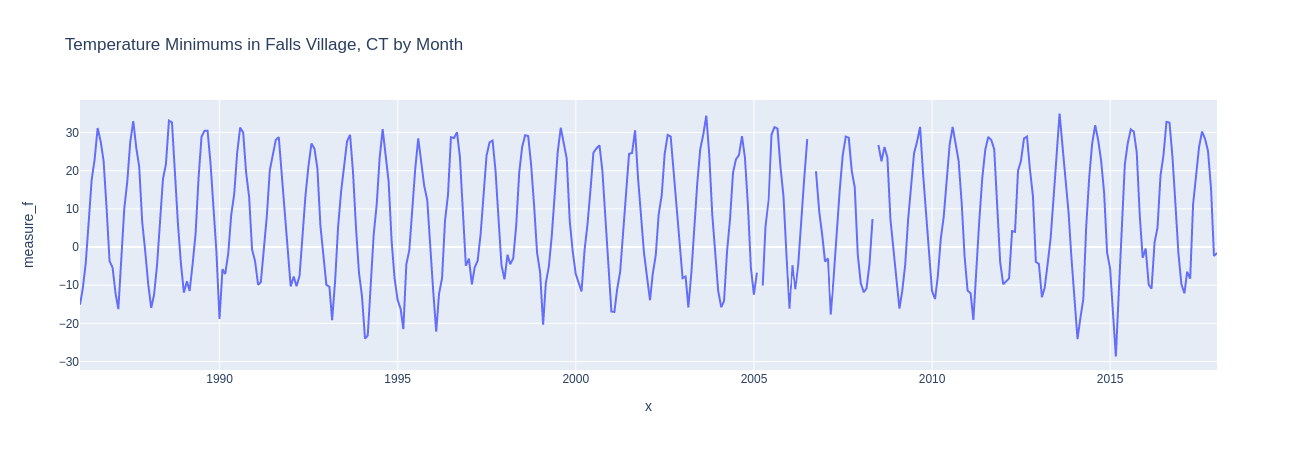

In [25]:
import plotly.express as px

df = weather_data_FALLS_VILLAGE_T_MIN
fig = px.line(df, x = df.index, y = 'measure_f', title='Temperature Minimums in Falls Village, CT by Month')
fig.show()

## Historical Commodity Prices

In [26]:
# Historical Commodity Data
#Import fred parser package for pulling in commodity data from FRED

import datapungi_fed as dpf

data = dpf.data(config.fred_key)

In [27]:
#Creating a dictionary of commodity tickers to read in all available daily data as needed, assuming more will be added

commodity_list = {'heating_oil':'DHOILNYH',
                  'crude_oil':'DCOILWTICO',
                  'natural_gas':'DHHNGSP',
                  'gasoline':'DGASNYH'}

commodity_df = {}

for key, value in commodity_list.items():
    commodity_df[key] = data.series(value)


#### FRED has additional monthly data for commodities, and no other daily spot price commodity data, and may use interpolation to fill the date gaps within the monthly data as needed.

#### There are some TDAmeritrade charts that can be adjsuted to show daily close price for commodities as well, but that data only goes back to 2000 (same with other sites with historical commodity data) and i would prefer more historical data. I will look at implications/possibilty of using partial historical data in conjunction with full historical data in training a model, but I am assuming this is a no-go.

### GDP Measures:

#### After looking into GDP measures, I am unusre how to apply this over the long-term, since it is given in annual values. If applying the value at the year level has any importance in the model prediction, I will include. GDP files are already downloaded locally from United Nations.

In [1]:
# Load in GDP data here and include in final dataframme
